In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train_data_imputation.csv')
train_data.head()

,id,home_team_abbr,away_team_abbr,date,is_night_game,home_team_win,home_pitcher,away_pitcher,home_team_rest,away_team_rest,...,away_pitcher_H_batters_faced_skew,away_pitcher_BB_batters_faced_mean,away_pitcher_BB_batters_faced_std,away_pitcher_BB_batters_faced_skew,away_pitcher_leverage_index_avg_mean,away_pitcher_leverage_index_avg_std,away_pitcher_leverage_index_avg_skew,away_pitcher_wpa_def_mean,away_pitcher_wpa_def_std,away_pitcher_wpa_def_skew
0,0.0,0.0,30.0,0.698692,0.0,1.0,0.0,749.0,1.0,1.000000,...,1.133350,-0.974559,-0.900633,-1.093425,0.896974,-0.611051,-0.398111,0.949021,1.007072,0.340438
1,1.0,1.0,31.0,0.420935,1.0,0.0,1.0,750.0,2.0,1.155109,...,-0.044641,-0.878649,-1.079528,-1.719608,0.050448,-0.851738,-0.202878,0.489511,-0.876286,1.416154
2,2.0,1.0,32.0,0.434766,1.0,1.0,2.0,751.0,1.0,1.000000,...,-0.100180,-1.702937,-0.867762,1.992552,-0.404961,-0.132717,-0.106344,2.481020,-0.200110,-0.026083
3,3.0,2.0,33.0,0.304299,1.0,1.0,3.0,752.0,1.0,1.000000,...,-1.385079,-1.549095,-1.008470,0.116080,-1.236753,-0.119898,0.005985,1.646317,-0.764309,-0.024865
4,4.0,3.0,34.0,0.034766,1.0,0.0,4.0,753.0,1.0,1.000000,...,0.356122,0.663967,-0.123547,0.361822,-0.035276,-0.285671,-2.563819,0.527432,-0.911987,-1.109533


In [2]:
train_data.shape

(11067, 165)

In [3]:
total_nan_count = train_data.isna().sum().sum()
print(total_nan_count)

0


In [4]:
# Function to fill NaN values with group average
def fill_na_with_group_mean(df, group_col, target_col):
    df[target_col] = df.groupby(group_col)[target_col].transform(
        lambda x: x.fillna(x.mean())
    )

# Apply the function to all columns except the grouping column
group_column = 'home_team_abbr'

for column in train_data.columns:
    if column != group_column and train_data[column].dtype != 'object':  # Skip non-numeric columns
        fill_na_with_group_mean(train_data, group_column, column)




In [5]:
total_nan_count = train_data.isna().sum().sum()
print(total_nan_count)

0


In [6]:
# Function to fill NaN values with group average
def fill_na_with_group_mean(df, group_col, target_col):
    df[target_col] = df.groupby(group_col)[target_col].transform(
        lambda x: x.fillna(x.mean())
    )

# Apply the function to all columns except the grouping column
group_column = 'away_team_abbr'

for column in train_data.columns:
    if column != group_column and train_data[column].dtype != 'object':  # Skip non-numeric columns
        fill_na_with_group_mean(train_data, group_column, column)

In [7]:
train_data = train_data.dropna(axis=0)  # axis=0 means rows


In [8]:
total_nan_count = train_data.isna().sum().sum()
print(total_nan_count)

0


In [9]:
train_data.head()

,id,home_team_abbr,away_team_abbr,date,is_night_game,home_team_win,home_pitcher,away_pitcher,home_team_rest,away_team_rest,...,away_pitcher_H_batters_faced_skew,away_pitcher_BB_batters_faced_mean,away_pitcher_BB_batters_faced_std,away_pitcher_BB_batters_faced_skew,away_pitcher_leverage_index_avg_mean,away_pitcher_leverage_index_avg_std,away_pitcher_leverage_index_avg_skew,away_pitcher_wpa_def_mean,away_pitcher_wpa_def_std,away_pitcher_wpa_def_skew
0,0.0,0.0,30.0,0.698692,0.0,1.0,0.0,749.0,1.0,1.000000,...,1.133350,-0.974559,-0.900633,-1.093425,0.896974,-0.611051,-0.398111,0.949021,1.007072,0.340438
1,1.0,1.0,31.0,0.420935,1.0,0.0,1.0,750.0,2.0,1.155109,...,-0.044641,-0.878649,-1.079528,-1.719608,0.050448,-0.851738,-0.202878,0.489511,-0.876286,1.416154
2,2.0,1.0,32.0,0.434766,1.0,1.0,2.0,751.0,1.0,1.000000,...,-0.100180,-1.702937,-0.867762,1.992552,-0.404961,-0.132717,-0.106344,2.481020,-0.200110,-0.026083
3,3.0,2.0,33.0,0.304299,1.0,1.0,3.0,752.0,1.0,1.000000,...,-1.385079,-1.549095,-1.008470,0.116080,-1.236753,-0.119898,0.005985,1.646317,-0.764309,-0.024865
4,4.0,3.0,34.0,0.034766,1.0,0.0,4.0,753.0,1.0,1.000000,...,0.356122,0.663967,-0.123547,0.361822,-0.035276,-0.285671,-2.563819,0.527432,-0.911987,-1.109533


In [11]:
from sklearn.model_selection import train_test_split

train_data = train_data.replace({True: 1, False: 0})
X = train_data.drop(['home_team_win'], axis=1)
y = train_data['home_team_win'].astype(int)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)

(8853, 164)
(8853,)


In [ ]:
X_train.head()

,is_night_game,home_team_rest,away_team_rest,home_pitcher_rest,away_pitcher_rest,season,home_batting_batting_avg_10RA,home_batting_onbase_perc_10RA,home_batting_onbase_plus_slugging_10RA,home_batting_leverage_index_avg_10RA,...,away_pitcher_H_batters_faced_skew,away_pitcher_BB_batters_faced_mean,away_pitcher_BB_batters_faced_std,away_pitcher_BB_batters_faced_skew,away_pitcher_leverage_index_avg_mean,away_pitcher_leverage_index_avg_std,away_pitcher_leverage_index_avg_skew,away_pitcher_wpa_def_mean,away_pitcher_wpa_def_std,away_pitcher_wpa_def_skew
414,1,1.0,1.0,5.000000,5.000000,2017.0,0.194583,-0.373370,-0.654895,1.833927,...,-0.287889,-0.828821,-1.062893,-1.112378,0.241184,-0.565233,0.738463,0.001448,0.968328,0.037937
6705,1,1.0,1.0,11.000000,6.000000,2016.0,-1.363801,-1.332759,-1.307187,-0.962153,...,0.147482,0.430644,0.024510,-0.982390,0.181713,-0.224031,0.240978,-2.174757,-0.683988,0.939810
2116,1,1.0,1.0,6.000000,6.000000,2018.0,0.611761,0.976279,1.500710,-0.755036,...,-0.146365,-0.088083,-0.322782,-1.043202,0.098668,-0.516258,0.041773,0.742911,0.502576,0.326446
1118,1,1.0,1.0,6.000000,6.000000,2023.0,0.549701,1.054330,0.504737,0.432435,...,-1.162045,0.478574,0.092752,-0.419175,0.479069,-0.274618,0.596447,1.783278,-0.885761,0.532101
7653,1,1.0,2.0,7.424837,6.790625,2018.0,0.653134,0.342106,-0.152232,1.039978,...,-0.094536,-2.384611,-0.076188,-0.068164,-5.532335,-0.081562,-0.015536,-0.525873,-0.050657,0.009793


In [ ]:
y_train.head()

414     0
6705    1
2116    0
1118    0
7653    1
Name: home_team_win, dtype: int64

In [ ]:
# Compare indices of X_train and y_train
print(X_train.index.equals(y_train.index))  # Should return True if aligned


True


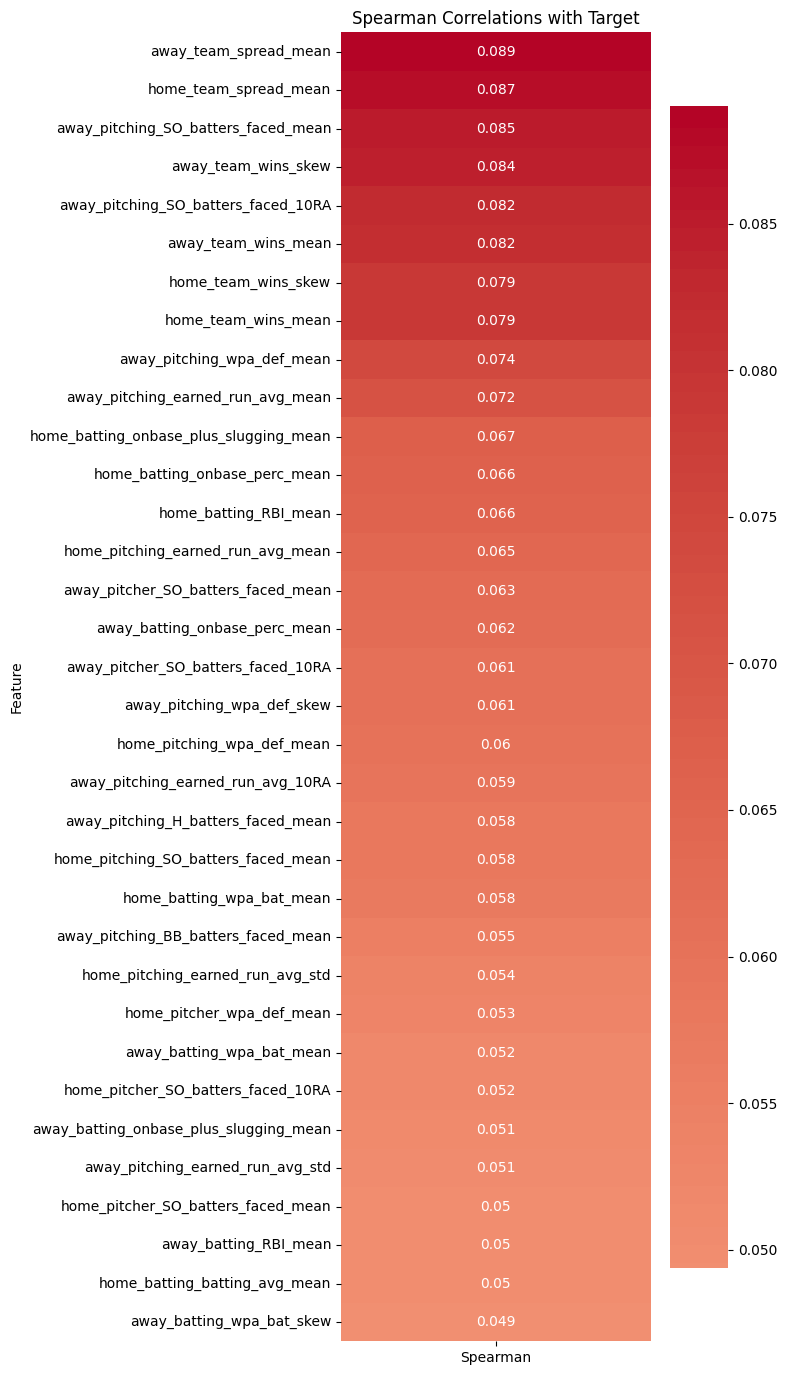

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def spearman_correlation_heatmap(X_train, y_train):
    # Ensure X_train contains only numeric data
    X_train = X_train.select_dtypes(include='number')
    
    # Calculate Spearman correlation for each column in X_train with y_train
    spearman_corr = X_train.apply(lambda col: spearmanr(col, y_train)[0])
    
    # Create a DataFrame for correlations
    corr_df = pd.DataFrame({
        'Feature': spearman_corr.index,
        'Spearman': spearman_corr.values
    }).set_index('Feature')
    
    # Drop columns with Spearman correlation less than 0.049
    corr_df = corr_df[corr_df['Spearman'].abs() >= 0.049]
    
    # Sort by absolute value of Spearman correlation in descending order
    corr_df = corr_df.abs().sort_values(by='Spearman', ascending=False)
    
    # Update X_train by keeping only features with correlation >= 0.049
    X_train = X_train[corr_df.index]
    
    # Plot the heatmap for sorted Spearman correlations
    plt.figure(figsize=(5, len(corr_df) // 2))  # Dynamically adjust height
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, cbar=True)
    plt.title('Spearman Correlations with Target')
    plt.show()
    
    # Return the updated X_train
    return X_train

# Usage example:
X_train_filtered = spearman_correlation_heatmap(X_train, y_train)



In [14]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier
import numpy as np

# Prepare the data for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Use 'multi:softmax' for multi-class classification
    'eval_metric': 'logloss',       # Evaluation metric
    'eta': 0.1,                     # Learning rate
    'max_depth': 2,                 # Tree depth
    'seed': 42,                     # Random seed
    'tree_method': 'gpu_hist'       # Enables GPU training
}

# Define evaluation sets
evals = [(dtrain, 'train'), (dval, 'eval')]

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10)

# Make predictions on the validation set
y_pred_proba_xgb = bst.predict(dval)
y_pred_xgb = (y_pred_proba_xgb > 0.5).astype(int)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb))




[0]	train-logloss:0.69007	eval-logloss:0.68940
[1]	train-logloss:0.68888	eval-logloss:0.68828
[2]	train-logloss:0.68782	eval-logloss:0.68756
[3]	train-logloss:0.68681	eval-logloss:0.68705
[4]	train-logloss:0.68592	eval-logloss:0.68646
[5]	train-logloss:0.68512	eval-logloss:0.68570
[6]	train-logloss:0.68427	eval-logloss:0.68514
[7]	train-logloss:0.68358	eval-logloss:0.68474
[8]	train-logloss:0.68288	eval-logloss:0.68431
[9]	train-logloss:0.68225	eval-logloss:0.68395
[10]	train-logloss:0.68164	eval-logloss:0.68349
[11]	train-logloss:0.68099	eval-logloss:0.68337
[12]	train-logloss:0.68043	eval-logloss:0.68304
[13]	train-logloss:0.67990	eval-logloss:0.68299
[14]	train-logloss:0.67927	eval-logloss:0.68274
[15]	train-logloss:0.67879	eval-logloss:0.68228
[16]	train-logloss:0.67827	eval-logloss:0.68190
[17]	train-logloss:0.67779	eval-logloss:0.68163
[18]	train-logloss:0.67725	eval-logloss:0.68137
[19]	train-logloss:0.67677	eval-logloss:0.68105
[20]	train-logloss:0.67627	eval-logloss:0.68107
[2

/home/jason/anaconda3/envs/mambayolo/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [02:59:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[70]	train-logloss:0.65942	eval-logloss:0.67811
[71]	train-logloss:0.65919	eval-logloss:0.67807
[72]	train-logloss:0.65893	eval-logloss:0.67796
[73]	train-logloss:0.65867	eval-logloss:0.67782
[74]	train-logloss:0.65837	eval-logloss:0.67781
[75]	train-logloss:0.65804	eval-logloss:0.67781
[76]	train-logloss:0.65777	eval-logloss:0.67785
[77]	train-logloss:0.65746	eval-logloss:0.67789
[78]	train-logloss:0.65717	eval-logloss:0.67800
[79]	train-logloss:0.65696	eval-logloss:0.67815
[80]	train-logloss:0.65671	eval-logloss:0.67820
[81]	train-logloss:0.65645	eval-logloss:0.67835
[82]	train-logloss:0.65618	eval-logloss:0.67844
[83]	train-logloss:0.65594	eval-logloss:0.67846
[84]	train-logloss:0.65559	eval-logloss:0.67833
XGBoost Accuracy: 0.5672990063233966
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.40      0.46      1020
           1       0.58      0.71      0.64      1194

    accuracy                           0.57     

In [15]:
# Modify Random Forest parameters
rf_model = RandomForestClassifier(
    n_estimators=100,          # Increase the number of trees
    max_depth=5,              # Set a maximum depth for the trees
    min_samples_split=5,       # Minimum samples required to split a node
    min_samples_leaf=2,        # Minimum samples required to be at a leaf node
    max_features='sqrt',       # Number of features to consider when looking for the best split
    bootstrap=True,            # Use bootstrap sampling
    random_state=42            # Seed for reproducibility
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds_val = rf_model.predict(X_val)

# Evaluate the modified Random Forest
print("Modified Random Forest Accuracy:", accuracy_score(y_val, rf_preds_val))
print("Modified Random Forest Classification Report:")
print(classification_report(y_val, rf_preds_val))


Modified Random Forest Accuracy: 0.5722673893405601
Modified Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.35      0.43      1020
           1       0.58      0.76      0.66      1194

    accuracy                           0.57      2214
   macro avg       0.57      0.56      0.54      2214
weighted avg       0.57      0.57      0.55      2214



In [16]:
# Modify Soft-Margin SVM parameters
svm_model = SVC(
    kernel='poly',             # Change to 'rbf' kernel for non-linear classification
    C=1,                     # Increase regularization strength for narrower margin
    gamma='scale',            # Use 'scale' (default) to adjust gamma automatically
    probability=True,         # Enable probability estimates
    random_state=42           # Seed for reproducibility
)

# Train the modified SVM
svm_model.fit(X_train, y_train)

# Make predictions
svm_preds_val = svm_model.predict(X_val)

# Evaluate the modified SVM
print("Modified SVM Accuracy:", accuracy_score(y_val, svm_preds_val))
print("Modified SVM Classification Report:")
print(classification_report(y_val, svm_preds_val))


Modified SVM Accuracy: 0.5392953929539296
Modified SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1020
           1       0.54      1.00      0.70      1194

    accuracy                           0.54      2214
   macro avg       0.27      0.50      0.35      2214
weighted avg       0.29      0.54      0.38      2214



/home/jason/anaconda3/envs/mambayolo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jason/anaconda3/envs/mambayolo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jason/anaconda3/envs/mambayolo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [19]:


# Evaluate individual models
print("Random Forest Accuracy:", accuracy_score(y_val, rf_preds_val))
#print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_preds_val))
print("SVM Accuracy:", accuracy_score(y_val, svm_preds_val))

# Ensemble: Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', rf_model),
    ],
    voting='soft'  # 'soft' for probabilities, 'hard' for majority voting
)

# Train the ensemble
ensemble_model.fit(X_train, y_train)

# Predict with the ensemble
ensemble_preds_val = ensemble_model.predict(X_val)

# Evaluate the ensemble
print("Ensemble Accuracy:", accuracy_score(y_val, ensemble_preds_val))
print("Ensemble Classification Report:")
print(classification_report(y_val, ensemble_preds_val))


Random Forest Accuracy: 0.5722673893405601
SVM Accuracy: 0.5392953929539296


/home/jason/anaconda3/envs/mambayolo/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy: 0.5668473351400181
Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.38      0.45      1020
           1       0.58      0.73      0.64      1194

    accuracy                           0.57      2214
   macro avg       0.56      0.55      0.55      2214
weighted avg       0.56      0.57      0.55      2214



In [ ]:
test_data = pd.read_csv('same_season_test_data.csv')
test_data.shape

(6185, 165)

In [ ]:
#Inference model

test_data = test_data.replace({True: 1, False: 0})
# Function to fill NaN values with group average
def fill_na_with_group_mean(df, group_col, target_col):
    df[target_col] = df.groupby(group_col)[target_col].transform(
        lambda x: x.fillna(x.mean())
    )

# Apply the function to all columns except the grouping column
group_column = 'home_team_abbr'

for column in test_data.columns:
    if column != group_column and test_data[column].dtype != 'object':  # Skip non-numeric columns
        fill_na_with_group_mean(test_data, group_column, column)

group_column = 'away_team_abbr'

for column in test_data.columns:
    if column != group_column and test_data[column].dtype != 'object':  # Skip non-numeric columns
        fill_na_with_group_mean(test_data, group_column, column)



/tmp/ipykernel_7772/1964563735.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data = test_data.replace({True: 1, False: 0})


In [ ]:
test_data.shape

(6185, 165)

In [ ]:
X_test  = test_data.drop([ 'id', 'home_team_season', 'away_team_season', 'home_team_abbr', 'away_team_abbr', 'home_pitcher', 'away_pitcher'], axis=1)
X_test.fillna(0, inplace=True)

total_nan_count = X_test.isna().sum().sum()
print(total_nan_count)

0


In [ ]:
X_test.head()

,is_night_game,home_team_rest,away_team_rest,home_pitcher_rest,away_pitcher_rest,season,home_batting_batting_avg_10RA,home_batting_onbase_perc_10RA,home_batting_onbase_plus_slugging_10RA,home_batting_leverage_index_avg_10RA,...,away_pitcher_H_batters_faced_skew,away_pitcher_BB_batters_faced_mean,away_pitcher_BB_batters_faced_std,away_pitcher_BB_batters_faced_skew,away_pitcher_leverage_index_avg_mean,away_pitcher_leverage_index_avg_std,away_pitcher_leverage_index_avg_skew,away_pitcher_wpa_def_mean,away_pitcher_wpa_def_std,away_pitcher_wpa_def_skew
0,0.0,1.0,1.0,5.000000,5.0,2017.0,0.815178,-0.139214,0.860108,-0.685997,...,1.897061,-0.021571,0.045967,0.657736,-0.105414,-0.215965,-0.341056,0.710790,-0.305795,-1.103229
1,1.0,1.0,1.0,6.000000,5.0,2023.0,-0.819056,-1.043317,-0.501758,0.266741,...,-0.174718,0.206991,-0.365752,-0.660023,-0.166158,-0.400556,0.189584,-0.129330,0.467740,0.873353
2,1.0,2.0,2.0,7.000000,6.0,2016.0,0.566940,0.133967,1.167550,-0.119877,...,2.960091,-0.027093,0.200172,0.096058,-0.088088,1.423080,1.902420,-0.486104,0.380234,0.944937
3,0.0,1.0,1.0,5.000000,5.0,2019.0,0.842760,-0.271643,0.494216,0.384107,...,-0.345691,-0.517786,-0.160474,0.970894,-0.028288,-0.272571,-0.366498,-0.583598,0.654581,-0.021218
4,0.0,1.0,1.0,7.186528,6.0,2016.0,1.849503,1.038070,0.939598,0.722399,...,0.948865,-0.248708,-0.401949,-0.229898,0.047862,-0.396524,-0.862731,-0.262628,0.444447,-0.113465


In [ ]:
X_test.shape
test_data.shape
train_data.shape

(8575, 167)

In [ ]:
# Convert X_test to DMatrix format
dtest = xgb.DMatrix(X_test)

# Make predictions
y_pred = bst.predict(dtest)

# Add predictions to the test data and prepare the submission
test_data['home_team_win'] = y_pred
# Convert predictions to True or False based on the threshold
test_data['home_team_win'] = np.where(y_pred >= 0.5, True, False)
submission = test_data[['id', 'home_team_win']]

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Preview the submission
submission.head()



/tmp/ipykernel_7772/3727876115.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data['home_team_win'] = y_pred


,id,home_team_win
0,0,True
1,1,False
2,2,True
3,3,True
4,4,False


In [ ]:
submission.shape

(6185, 2)

In [ ]:
sample_data = pd.read_csv('same_season_sample_submission.csv')

In [ ]:
sample_data.shape

(6185, 2)